<a href="https://colab.research.google.com/github/mohssinehamada/Blood-Bank-Management-System/blob/master/hand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [14]:
%tensorflow_version 2.x 

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [17]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [10]:
train_images.shape

(60000, 28, 28)

In [34]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [12]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]

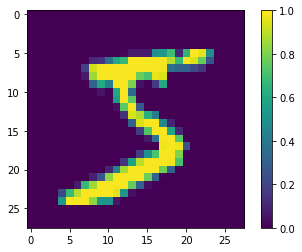

In [33]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [18]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
model.fit(train_images, train_labels, epochs=7)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0374 - accuracy: 0.9882
Epoch 2/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0303 - accuracy: 0.9905
Epoch 3/7
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0233 - accuracy: 0.9927
Epoch 4/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0196 - accuracy: 0.9940
Epoch 5/7
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0155 - accuracy: 0.9952
Epoch 6/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0149 - accuracy: 0.9949
Epoch 7/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0116 - accuracy: 0.9965


In [41]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0840 - accuracy: 0.9777
Test accuracy: 0.9776999950408936


In [42]:
predictions = model.predict(test_images)

In [43]:
predictions[0]

array([4.9741705e-10, 1.1200009e-11, 4.7962594e-09, 6.1278301e-06,
       3.0856763e-14, 1.3883295e-10, 4.0087274e-15, 9.9998891e-01,
       8.1292306e-09, 4.9726059e-06], dtype=float32)

In [44]:
np.argmax(predictions[0])

7

In [45]:
test_labels[0]

7

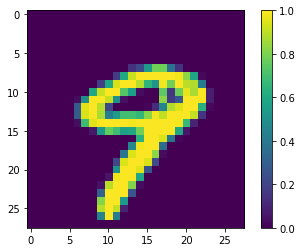

In [50]:
plt.figure()
plt.imshow(test_images[9])
plt.colorbar()
plt.grid(False)
plt.show()


Pick a number: 90


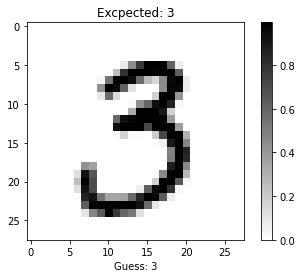

In [53]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ["0","1","2","3","4","5","6","7","8","9"]
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)